In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.datasets import make_blobs, make_regression, make_classification
from sklearn.model_selection import train_test_split

# Create Dataset

In [2]:
# 回帰用人工データを作成
X_reg, y_reg = make_regression(n_samples=3000,
                               n_features=10,
                               n_informative=7,
                               n_targets=1,
                               bias=23.0,
                               noise=0.3,
                               shuffle=True,
                               random_state=923)

In [3]:
# 2クラス分類用の人工データを作成
X2, y2 = make_classification(n_samples=1000,
                             n_features=15,
                             n_informative=8,
                             n_redundant=7,
                             n_classes=2,
                             n_clusters_per_class=1,
                             weights=[0.6, 0.4],
                             shift=24.0,
                             scale=1.0,
                             flip_y=0.05,
                             shuffle=True,
                             random_state=925)

In [4]:
# 多クラス(5クラス)分類用の人工データを生成
X5, y5 = make_blobs(n_samples=1000,
                    n_features=2,
                    centers=5,
                    cluster_std=3.0,
                    center_box=(-20, 25),
                    shuffle=True,
                    random_state=84)

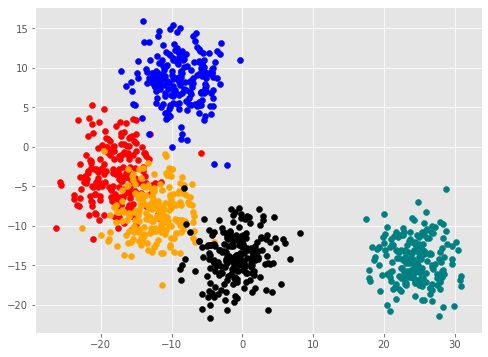

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X5[:, 0][y5==0], X5[:, 1][y5==0], c="red")
plt.scatter(X5[:, 0][y5==1], X5[:, 1][y5==1], c="blue")
plt.scatter(X5[:, 0][y5==2], X5[:, 1][y5==2], c="teal")
plt.scatter(X5[:, 0][y5==3], X5[:, 1][y5==3], c="orange")
plt.scatter(X5[:, 0][y5==4], X5[:, 1][y5==4], c="black")
plt.show()

In [6]:
X_reg_train, X_reg_val, y_reg_train, y_reg_val = train_test_split(X_reg, y_reg, random_state=91)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, random_state=913)
X5_train, X5_val, y5_train, y5_val = train_test_split(X5, y5, random_state=913)

# LightGBM

### Parameters
  
・ task # train, predict, etc.  
・ boosting_type # gbdt
  
・ objective 目的関数  
・・ regression 回帰  
・・ binary 二値分類  
・・ multiclass 多クラス分類    
・・(num_class) multiclassのときは設定推奨
  
・ metric  
・・ mae  
・・ mse  
・・ binary_logloss  
・・ binary_error  
・・ multi_logloss  
・・ multi_error  
  
・ num_leaves (default=31)  
・ learning_rate  
・ max_depth (-1 = 制限なし)  
・ max_bin # 一つの分岐に入るデータ数の最大値  

In [7]:
import lightgbm as lgb

In [8]:
params_reg = {
    "task": "train",
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "mse",
    "num_leaves": 20,
    "learning_rate": 0.1
}

lgb_reg_train = lgb.Dataset(X_reg_train, label=y_reg_train)
lgb_reg_val = lgb.Dataset(X_reg_val, label=y_reg_val, reference=lgb_reg_train)

llgb_reg = lgb.train(params=params_reg,
                     train_set=lgb_reg_train,
                     valid_sets=(lgb_reg_train, lgb_reg_val),
                     num_boost_round=1000,
                     early_stopping_rounds=5,
                     verbose_eval=20)

Training until validation scores don't improve for 5 rounds
[20]	training's l2: 2842.12	valid_1's l2: 4059.21
[40]	training's l2: 588.424	valid_1's l2: 1440.83
[60]	training's l2: 249.159	valid_1's l2: 895.717
[80]	training's l2: 175.395	valid_1's l2: 737.686
[100]	training's l2: 138.353	valid_1's l2: 683.092
[120]	training's l2: 115.104	valid_1's l2: 658.843
[140]	training's l2: 95.5691	valid_1's l2: 637.082
[160]	training's l2: 80.6143	valid_1's l2: 624.67
[180]	training's l2: 68.6198	valid_1's l2: 616.717
[200]	training's l2: 58.6973	valid_1's l2: 609.227
Early stopping, best iteration is:
[214]	training's l2: 53.5026	valid_1's l2: 605.595


In [9]:
params_2 = {
    "task": "train",
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 31,
    "learning_rate": 0.1
}

lgb_2_train = lgb.Dataset(X2_train, label=y2_train)
lgb_2_val = lgb.Dataset(X2_val, label=y2_val, reference=lgb_2_train)

lgb_2 = lgb.train(params=params_2,
                  train_set=lgb_2_train,
                  valid_sets=(lgb_2_train, lgb_2_val),
                  num_boost_round=1000,
                  early_stopping_rounds=5,
                  verbose_eval=20)

Training until validation scores don't improve for 5 rounds
[20]	training's binary_logloss: 0.214441	valid_1's binary_logloss: 0.33449
[40]	training's binary_logloss: 0.0864082	valid_1's binary_logloss: 0.282105
Early stopping, best iteration is:
[49]	training's binary_logloss: 0.0587795	valid_1's binary_logloss: 0.276345


In [10]:
params_5 = {
    "task": "train",
    "boosting_type": "gbdt",
    "objective": "multiclass",
    "num_class": 5,
    "metric": "multi_logloss",
    "num_leaves": 31,
    "learning_rate": 0.1
}

lgb_5_train = lgb.Dataset(X5_train, label=y5_train)
lgb_5_val = lgb.Dataset(X5_val, label=y5_val, reference=lgb_5_train)

lgb_5 = lgb.train(params=params_5,
                  train_set=lgb_5_train,
                  valid_sets=(lgb_5_train, lgb_5_val),
                  num_boost_round=1000,
                  early_stopping_rounds=5,
                  verbose_eval=20)

Training until validation scores don't improve for 5 rounds
[20]	training's multi_logloss: 0.27702	valid_1's multi_logloss: 0.357696
[40]	training's multi_logloss: 0.109847	valid_1's multi_logloss: 0.223101
Early stopping, best iteration is:
[54]	training's multi_logloss: 0.0734016	valid_1's multi_logloss: 0.207991


# visualization

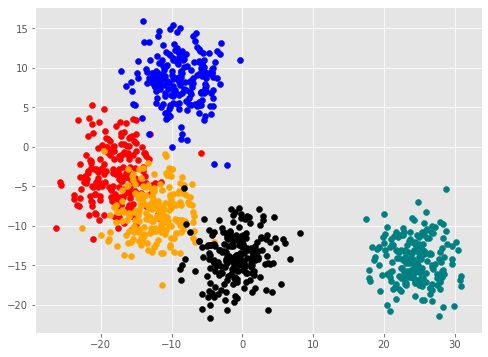

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(X5[:, 0][y5==0], X5[:, 1][y5==0], c="red")
plt.scatter(X5[:, 0][y5==1], X5[:, 1][y5==1], c="blue")
plt.scatter(X5[:, 0][y5==2], X5[:, 1][y5==2], c="teal")
plt.scatter(X5[:, 0][y5==3], X5[:, 1][y5==3], c="orange")
plt.scatter(X5[:, 0][y5==4], X5[:, 1][y5==4], c="black")
plt.show()

In [12]:
# 格子状の点を用意
sample = np.array([(i, j) for i in np.arange(-30, 35, 0.1) for j in np.arange(-25, 20, 0.1)])

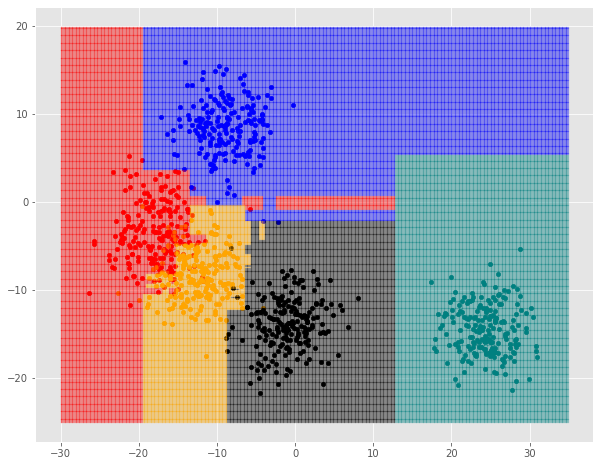

In [13]:
pred = lgb_5.predict(sample, num_iteration=lgb_5.best_iteration)
pred = np.argmax(pred, axis=1)

plt.figure(figsize=(10,8))

# 元データをプロット
plt.scatter(X5[:, 0][y5==0], X5[:, 1][y5==0], c="red", s=20)
plt.scatter(X5[:, 0][y5==1], X5[:, 1][y5==1], c="blue", s=20)
plt.scatter(X5[:, 0][y5==2], X5[:, 1][y5==2], c="teal", s=20)
plt.scatter(X5[:, 0][y5==3], X5[:, 1][y5==3], c="orange", s=20)
plt.scatter(X5[:, 0][y5==4], X5[:, 1][y5==4], c="black", s=20)

# 格子状の点に対して推定したデータをプロット
plt.scatter(sample[pred==0, 0], sample[pred==0, 1], c="red", s=1, alpha=0.2)
plt.scatter(sample[pred==1, 0], sample[pred==1, 1], c="blue", s=1, alpha=0.2)
plt.scatter(sample[pred==2, 0], sample[pred==2, 1], c="teal", s=1, alpha=0.2)
plt.scatter(sample[pred==3, 0], sample[pred==3, 1], c="orange", s=1, alpha=0.2)
plt.scatter(sample[pred==4, 0], sample[pred==4, 1], c="black", s=1, alpha=0.2)
plt.show()